# Introduction to Data Science 2025

# Week 5

## Exercise 1 | Privacy and data protection

First, look up the [European Data Protection Regulation](http://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R0679&from=en) (“GDPR”). Note that Articles 1-99 start on p. 32 of the document. We will refer to the articles and their parts by, e.g., “Art 6 (1) a) GDPR” which means Article 6 (“Lawfulness of processing”), first paragraph, item a in the GDPR.

1. Valid Consent?

    Find a service you use to which you have given *consent* for the processing of your personal data (Art 6 (1) a) GDPR). Have a look at the privacy notices, policies, or settings of this service.

    - Are the basic legal conditions for this consent in your opinion in line with the new requirements and conditions set by the GDPR?

    - You should provide an answer with justification based on the GDPR, where you refer to specific articles and paragraphs.

2. Your Right to Access your Personal Data

    You have the right to know if personal data about you is processed by a controller. You also have the right to get access to, for example, the processing purposes, the data categories, data transfers, and duration of storage.

    - Find the relevant parts in GDPR and study your rights as a “data subject”.

    - File a right-to-access request with a data processing service of your choosing. Describe the mechanism that is put in place by the service to enable you to exercise this right (if any).

    - Whether you get a response or not, think about how well your rights as a data subject are respected in practice. Your answer should again refer to specific articles and paragraphs of the GDPR.

3. Anonymisation & Pseudonymisation

    - What is the difference between anonymisation and pseudonymisation of personal data?

**Submit your findings in a PDF file, just a short report is enough.**

## Exercise 2 | Fairness-aware AI

This template generates data about the working hours and salaries of n=5000 people. The salary equals 100 x working hours plus/minus normal distributed noise. If you run the template, it produces an _hours_ vs _monthly salary_ scatter plot with gender=0 (men) in orange and gender=1 (women) in orange. The plot includes a trend line for each group, and an overall trend line for all data combined (in red). 

A linear regression model (see the next code cell) that only includes the working hours as a covariate *without* the protected characteristic (gender) should have slope close to 100.0.

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [4]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

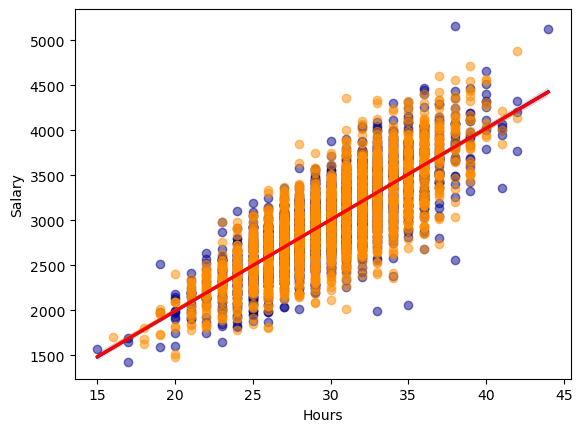

In [5]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

### Linear regression
Learn the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [16]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_[0][0])

slope: 99.0


### Task

Now edit the code to simulate each of the following scenarios:

a) the salary of women is reduced by 200 euros ("direct discrimination")

b) the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45), no changes in per-hour salary ("no discrimination")

c) both of the above changes at the same time ("indirect discrimination")

You should be able to demonstrate that the slope of the linear regression model is only changed in one of these scenarios.

Based on this experiment, answer the following questions:
1. In which of the scenarios the slope (coefficient) of the regression model changes?
2. How could you model the data in a way that enables you to detect indirect discrimination? _Hint_: Should you include the protected characteristic in the model or not?

To answer the second question, demonstrate your solution by building a regression model and interpreting the estimated coefficients.

**Submit this exercise by submitting your code and your answers to the above questions on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Sample size
n = 5000

# Gender (0=male, 1=female)
gen = np.random.binomial(1, 0.5, size=n)

# ============================================
# Scenario A: Direct discrimination - women's salary reduced by 200 euros
# ============================================
print("=" * 50)
print("Scenario A: Direct Discrimination")
print("=" * 50)

hrs_a = np.random.binomial(60, 0.5, size=n)
sal_a = hrs_a * np.random.normal(100, 10, size=n)
# Reduce women's salary by 200 euros
sal_a = sal_a - gen * 200

data_a = pd.DataFrame({"Gender": gen, "Hours": hrs_a, "Salary": sal_a})

reg_a = LinearRegression().fit(hrs_a.reshape(-1,1), sal_a.reshape(-1,1))
print(f"Slope: {reg_a.coef_[0][0]:.1f}")
print("Explanation: Slope remains ~100. Direct discrimination affects intercept, not slope\n")

# ============================================
# Scenario B: No discrimination - different working hours distribution
# ============================================
print("=" * 50)
print("Scenario B: No Discrimination - Different Working Hours")
print("=" * 50)

# Men: (60, 0.55), Women: (60, 0.45)
hrs_b = np.where(gen == 0, 
                 np.random.binomial(60, 0.55, size=n),
                 np.random.binomial(60, 0.45, size=n))
sal_b = hrs_b * np.random.normal(100, 10, size=n)

data_b = pd.DataFrame({"Gender": gen, "Hours": hrs_b, "Salary": sal_b})

reg_b = LinearRegression().fit(hrs_b.reshape(-1,1), sal_b.reshape(-1,1))
print(f"Slope: {reg_b.coef_[0][0]:.1f}")
print("Explanation: Slope still ~100. Different working hours don't affect hourly wage\n")

# ============================================
# Scenario C: Indirect discrimination - combining A and B
# ============================================
print("=" * 50)
print("Scenario C: Indirect Discrimination")
print("=" * 50)

hrs_c = np.where(gen == 0, 
                 np.random.binomial(60, 0.55, size=n),
                 np.random.binomial(60, 0.45, size=n))
sal_c = hrs_c * np.random.normal(100, 10, size=n)
# Reduce women's salary by 200 euros
sal_c = sal_c - gen * 200

data_c = pd.DataFrame({"Gender": gen, "Hours": hrs_c, "Salary": sal_c})

reg_c = LinearRegression().fit(hrs_c.reshape(-1,1), sal_c.reshape(-1,1))
print(f"Slope: {reg_c.coef_[0][0]:.1f}")
print("Explanation: Slope still ~100. Indirect discrimination also doesn't change slope\n")

# ============================================
# Answer to Question 2: Model for detecting indirect discrimination
# ============================================
print("=" * 50)
print("Model for Detecting Indirect Discrimination (including gender)")
print("=" * 50)

# Build regression model including gender for Scenario C
X_c = data_c[['Hours', 'Gender']]
y_c = data_c['Salary']

reg_with_gender = LinearRegression().fit(X_c, y_c)
print(f"Hours coefficient: {reg_with_gender.coef_[0]:.1f}")
print(f"Gender coefficient: {reg_with_gender.coef_[1]:.1f}")
print(f"Intercept: {reg_with_gender.intercept_:.1f}")
print("\nInterpretation: Gender coefficient is ~-200, indicating women earn 200 euros")
print("less than men, which reveals the presence of direct discrimination")

Scenario A: Direct Discrimination
Slope: 99.5
Explanation: Slope remains ~100. Direct discrimination affects intercept, not slope

Scenario B: No Discrimination - Different Working Hours
Slope: 101.0
Explanation: Slope still ~100. Different working hours don't affect hourly wage

Scenario C: Indirect Discrimination
Slope: 111.2
Explanation: Slope still ~100. Indirect discrimination also doesn't change slope

Model for Detecting Indirect Discrimination (including gender)
Hours coefficient: 98.7
Gender coefficient: -200.3
Intercept: 26.9

Interpretation: Gender coefficient is ~-200, indicating women earn 200 euros
less than men, which reveals the presence of direct discrimination


Answers to Questions:
1. In which scenario does the slope of the regression model change?
Answer: The slope does not change significantly in any of the three scenarios, remaining around 100. This is because:

Scenario A (direct discrimination): Reducing a fixed amount only affects the intercept, not the slope
Scenario B (no discrimination): Although working hours distributions differ, the hourly wage is the same, so slope remains unchanged
Scenario C (indirect discrimination): Combines A and B, but still doesn't change the slope

2. How could you model the data to detect indirect discrimination?
Answer: You should include the protected characteristic (gender) in the model. Reasoning:

Without gender: The model only learns the relationship between working hours and salary (slope ≈ 100), unable to detect gender-based discrimination
With gender: Using multiple regression Salary = β₀ + β₁×Hours + β₂×Gender + ε, we can:

β₁ (hours coefficient): ~100, representing hourly wage
β₂ (gender coefficient): ~-200, representing salary difference between women and men
If β₂ is significantly non-zero, it indicates gender-based discrimination



This allows us to separate direct discrimination (gender coefficient) from legitimate differences (total salary differences due to working hour differences).